# Creation of a american words lexicon

This notebook implements **the creation of an American words lexicon using Chat-GPT** which will then be used to assess the "percentage" of American culture in each plot summaries (see notebooks *NLP_P3.ipynb* and *results_P3.ipynb*) ([Chat-GPT](https://chatgpt.com/)). The procedure is simple: one asks Chat-GPT to generate a Python set of 200 words that are unique to the American culture and that truly represent it. Using Chat-GPT in this case is relevant since it has been trained on the entire internet and thus has seen a tremendous amount of text resources abouit the United States such as review articles, wikipedia pages, etc. To obtain a valuable list, one uses Chat-GPT 4o model along with multiple list generations. The final list is taken as the intersection of all generated lists (NB: this directly implement online in the chat with Chat-GPT and not in this notebook). Fimally to increase the granularity of the generated lexicon, one allows Chat-GPT to generate multi-words expressions as *slam dunk* or *white house* for example. All the words are written in lowercase to faciliate the integration of the set in *Spacy* NLP pipeline implmented in the *NLP_P3.ipynb* notebook.

However one must keep in mind that generating "only" 200 words to create a lexicon representing American culture is not perfect. Indeed, adding more words will allow to better "grasp" the American culture in the plots summaries. The choice of the number of words is then a trade-off between the running time of NLP scripts on plots summaries and the targetd precision. A former studied approach was to scrap wikipedia pages of the United States along with other wikipedia country pages using built-in Python libraries. This method was abondonned because of the too high number of irrelevant  words. For example, if the word *table*, having nothing to do with American culture, was appearing in the United States Wikipedia page but not in the pages of France, Canada and Germany, it was added to the list. Furthermore, typical American words such as *hollywood*, *thanksgiving* and *comboy* could appear in other wikipedia pages,  removing them from the *unique_us_words* and making those pages unusable unless one wanted to re-add manually to the set of American words. This explains the choice of using Chat_GPT for the creation of the American lexicon.

In [7]:
# Needed libraries
import pickle # to save the set of unique amercians words, i.e. the lexicon of american words in format one can reuse later in other notebooks
import numpy as np
import matplotlib.pyplot as plt  
from PIL import Image
from wordcloud import WordCloud, STOPWORDS # to generate word clouds images

#### Using CHat-GPT to generate a list of typical american words

In [24]:
# Acknowledgement: Chat_GPT was used to generate the below list (https://chatgpt.com/)

american_words_chatGPT = {
    "baseball", "cheeseburger", "cowboy", "thanksgiving", "liberty", "freedom",
    "rodeo", "hamburger", "apple pie", "constitution", "fireworks", "patriotism",
    "super bowl", "route 66", "hollywood", "broadway", "jazz", "blues",
    "rock n roll", "country music", "bluegrass", "motown", "grunge", "hip hop",
    "pickup truck", "suburbia", "mall", "prom", "homecoming", "tailgate",
    "fraternity", "sorority", "campus", "yearbook", "cheerleader", "quarterback",
    "touchdown", "basketball", "slam dunk", "home plate", "strikeout", "dugout",
    "amendment", "democracy", "capitalism", "election", "congress", "senator",
    "president", "independence", "uncle sam", "yankee", "republican", "democrat",
    "capital hill", "bald eagle", "statue of liberty", "mount rushmore", "white house",
    "civil war", "peanut butter", "cornbread", "hot dog", "grill", "barbecue",
    "drive in", "diner", "soda", "milkshake", "fries", "pancakes",
    "mac and cheese", "brownie", "casserole", "jerky", "root beer", "cranberry",
    "pentagon", "turkey", "pumpkin pie", "black friday", "cyber monday", "supermarket",
    "motel", "vacation", "summer break", "spring break", "halloween",
    "trick or treat", "jack o lantern", "costume", "firetruck", "sheriff",
    "deputy", "high school", "college life", "sports bar", "tailgating",
    "fishing trip", "hunting", "road trip", "cross country", "main street",
    "front porch", "backyard", "grill master", "fifties diner", "motor mouth",
    "homemaker", "firefighter", "lifeguard", "patriotic", "flag", "pledge",
    "marching band", "parade", "homecoming", "western", "cowgirl", "rancho",
    "daisy dukes", "redneck", "hillbilly", "country fair", "state fair",
    "bike rally", "motorcycle club", "bargain hunter", "yard sale", "roadside",
    "americana", "nostalgia", "jeans", "cowboy boots", "stetson", "leather jacket",
    "surfboard", "skateboard", "roller skates", "hot rod", "drag strip",
    "car show", "muscle car", "pickup", "highway", "freeway", "interstate",
    "pioneers", "settlers", "manifest destiny", "gold rush", "saloon", "wild west", "frontiersman",
    "donut", "doughnut", "mcdonalds", "cadillac", "ford", "mustang", "buick", "chevrolet", "jeep", "fast food",
    "fourth of july", "nfl", "silicon valley", "nascar", "nba", "cheerleading", "swing state", "harley-davidson",
    "pickup truck", "drive-in", "marshmallow", "cola", "bbq", "summer camp", "supreme court", "senate", "colt revolver"
    "apollo mission", "electoral college", "bourbon", "fort knox", "harvard", "stars and stripes", "lincoln memorial", "jefferson memorial",
    "capitol hill", "smithsonian", "super tuesday", "elvis", "kentucky derby", "trailer park", "college football", 
    "high school graduation", "founding fathers", "revolutionary war", "yosemite", "dodge", "rust belt", "hustle"
}

print(f"The number of american words generated with ChatGPT are {len(american_words_chatGPT)}.")

The number of american words generated with ChatGPT are 200.


### Saving the lexicon of US words for later use

In [25]:
# Save the set
with open('data/NLP_datasets/NLP_US_lexicon/unique_us_words_set.pkl', 'wb') as f:
    pickle.dump(american_words_chatGPT, f)

### Generating a word cloud

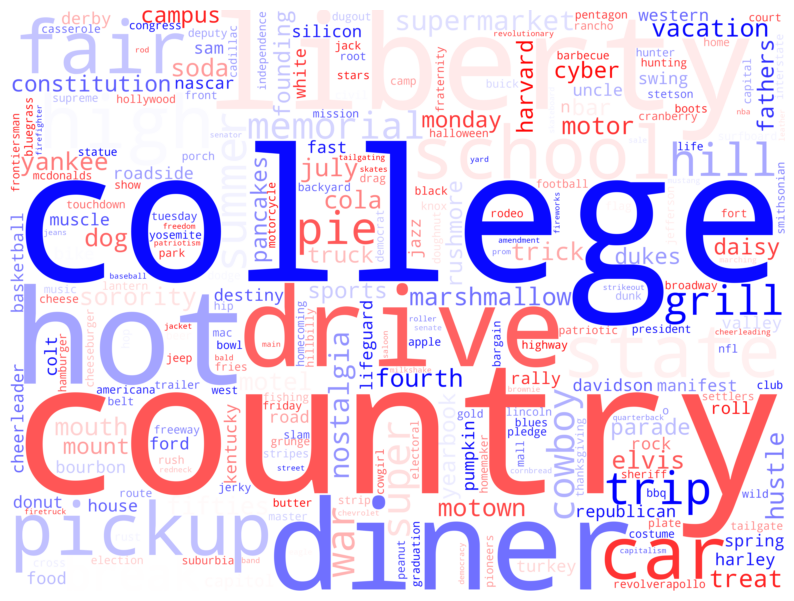

In [26]:
# Inspiration taken from: https://www.datacamp.com/tutorial/wordcloud-python & https://stackoverflow.com/questions/67984542/can-we-change-the-color-of-the-wordcloud-to-make-it-darker-in-python-can-wordcl 
 
# Load the American flag mask
# mask = np.array(Image.open(r'C:/Users/YourName/american_flag_mask.png'))

# Define text from the set of words
text = " ".join(american_words_chatGPT)

# Create the WordCloud
wc = WordCloud(
    background_color="white",
    max_words=2000,
    contour_width=3,
    contour_color="red",
    colormap= "bwr",
    width=4000,      # Increase image width
    height=3000 
)

# Generate the word cloud
wc.generate(text)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig("data/NLP_datasets/NLP_US_lexicon/american_flag_wordcloud_lexicon.png", dpi=300, bbox_inches='tight') # save the words cloud for later use at high resolution
plt.show()